HW4
Name: Qifan Chen
USCID: 9166932624



In [197]:
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
from IPython.display import display
import os
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from natsort import natsorted
from IPython.display import display
from scipy.stats import bootstrap
from scipy.stats import bootstrap

(a):
Download the AReM data.

In [198]:
import os
folder_path = "../data/AReM"
folders = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking"]

for folder in folders:
    folder_dir = os.path.join(folder_path, folder)

    if os.path.exists(folder_dir) and os.path.isdir(folder_dir):
        csv_files = len([file for file in os.listdir(folder_dir) if file.endswith(".csv")])
        print(f"The # of CSV files of {folder} is：{csv_files}")
    else:
        print(f"Folder {folder} is not exist")

The # of CSV files of bending1 is：7
The # of CSV files of bending2 is：6
The # of CSV files of cycling is：15
The # of CSV files of lying is：15
The # of CSV files of sitting is：15
The # of CSV files of standing is：15
The # of CSV files of walking is：15


(b):
Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1, 2, and 3 in other folders as test data and other datasets as train data.

In [199]:
actions = ["bending1", "bending2", "cycling", "lying", "sitting", "standing", "walking","test"]
# Floder names in alphabetical order of first letter

data_list = [] # store all of data frames
test_index = [] # store test data index
train_index = [] # store training data index
class_list = [] # store classes
binary_class = [] # store bending or not defined by 1, 0
i = 0

for act in actions:
    for f in natsorted(glob.glob(os.path.join("../data/AReM/", act, "*.csv"))):
        names=["time", "avg_rss12", "var_rss12", "avg_rss13", "var_rss13", "avg_rss23", "var_rss23", "test"]
        class_list.append(act)

        if act in ["bending1", "bending2"]:
            binary_class.append(1)
        else:
            binary_class.append(0)

        data_list.append(pd.read_csv(f, skiprows=range(5), index_col=0, names=names, header=None))

        if act in actions[:2]:
            if f.split("/")[-1] in [f"dataset{x}.csv" for x in range(1, 3)]:
                test_index.append(i)
            else:
                train_index.append(i)

        if act in actions[2:]:
            if f.split("/")[-1] in [f"dataset{x}.csv" for x in range(1, 4)]:
                test_index.append(i)
            else:
                train_index.append(i)
        i += 1

for d in data_list:
    d.drop(d.columns[6], axis=1, inplace=True)

print(len(train_index) + len(test_index))

88


(c)Feature Extraction
i.

1. Statistical Features:
    a. Mean
    b. Median
    c. Standard Deviation
    d. Skewness, Kurtosis
    e. Minimum and Maximum
2. Time Series Analysis Related Features:
    a. Cross Correlation
    b. Auto Correlation
    c. Parameters of Autoregressive (AR) part of Autoregressive Integrated Moving Average (ARIMA) model
    d. Parameters of Moving Average (MA) part of ARIMA model
    e. Orders of AR, Integrated (I) and MA part of ARIMA model

ii.
Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series in each instance. You are free to normalize/standardize features or use them directly.

In [200]:
TDF = [] # store time domain features' results
feature_names = data_list[0].describe().drop(index='count').index.tolist()

for d in data_list:
    TDF.append(d.describe().drop(index='count').to_numpy().flatten('F'))

In [201]:
data_list[0].describe()

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,40.624792,0.358604,19.040937,0.832542,34.311292,0.570583
std,1.476967,0.322605,4.462952,0.965659,2.188449,0.582915
min,37.250000,0.000000,4.000000,0.000000,27.250000,0.000000
25%,39.250000,0.000000,16.000000,0.000000,33.000000,0.000000
50%,40.500000,0.430000,19.250000,0.500000,35.000000,0.430000
75%,42.000000,0.500000,23.250000,1.120000,36.000000,1.300000
max,45.000000,1.300000,29.500000,7.230000,38.250000,1.920000


In [202]:
columns = []

for i in range(1,7):
    for name in feature_names:
        columns.append(name+str(i))
TDF_df = pd.DataFrame(TDF, columns=columns)
TDF_df

,mean1,std1,min1,25%1,50%1,75%1,max1,mean2,std2,min2,...,50%5,75%5,max5,mean6,std6,min6,25%6,50%6,75%6,max6
0,40.624792,1.476967,37.25,39.25,40.50,42.0000,45.00,0.358604,0.322605,0.0,...,35.00,36.00,38.25,0.570583,0.582915,0.00,0.0000,0.43,1.3000,1.92
1,42.812812,1.435550,38.00,42.00,42.50,43.6700,45.67,0.372437,0.289158,0.0,...,33.00,34.50,38.50,0.571083,0.601010,0.00,0.0000,0.43,1.3000,3.11
2,43.954500,1.558835,35.00,43.00,44.33,45.0000,47.40,0.426250,0.338690,0.0,...,36.00,36.50,38.50,0.493292,0.513506,0.00,0.0000,0.43,0.9400,1.79
3,42.179812,3.670666,33.00,39.15,43.50,45.0000,47.75,0.696042,0.630860,0.0,...,35.00,36.33,38.67,0.613521,0.524317,0.00,0.0000,0.50,1.0000,2.18
4,41.678063,2.243490,33.00,41.33,41.75,42.7500,45.75,0.535979,0.405469,0.0,...,30.00,31.25,37.50,0.383292,0.389164,0.00,0.0000,0.43,0.5000,1.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,33.586875,4.650935,19.50,30.25,34.25,37.0000,45.33,4.576562,2.461077,0.0,...,16.00,18.25,25.00,3.259729,1.640243,0.00,2.0500,3.11,4.3225,8.32
84,34.322750,4.752477,19.75,31.00,35.25,38.0000,45.50,4.456333,2.599284,0.0,...,15.75,17.75,23.25,3.432563,1.732727,0.00,2.1575,3.20,4.5650,9.67
85,34.546229,4.842294,19.50,31.25,35.25,37.8125,46.00,4.371958,2.360448,0.0,...,15.75,17.75,22.75,3.338125,1.656742,0.00,2.1600,3.08,4.3350,10.00
86,34.873229,4.531720,23.50,31.75,35.25,38.2500,46.25,4.380583,2.435437,0.0,...,16.00,18.00,23.50,3.424646,1.690960,0.00,2.1700,3.27,4.5000,9.51


iii.
Estimate the standard deviation of each of the time-domain features you extracted from the data. Then, use Python’s bootstrapped or any other method to build a 90% bootsrap confidence interval for the standard deviation of each feature.

In [203]:
import pandas as pd
import numpy as np

data_folders = {
    'bending1': {'training': np.arange(5)+3, 'test': np.arange(2)+1},
    'bending2': {'training': np.arange(4)+3, 'test': np.arange(2)+1},
    'cycling': {'training': np.arange(12)+4, 'test': np.arange(3)+1},
    'lying': {'training': np.arange(12)+4, 'test': np.arange(3)+1},
    'sitting': {'training': np.arange(12)+4, 'test': np.arange(3)+1},
    'standing': {'training': np.arange(12)+4, 'test': np.arange(3)+1},
    'walking': {'training': np.arange(12)+4, 'test': np.arange(3)+1}
}

trainingData = np.zeros([480, 7])
trainingLabel = np.zeros([480, 1])
testData = np.zeros([480, 7])

import pandas as pd
import numpy as np

def read_data(folder, subset):
    global trainingData, trainingLabel
    df = pd.DataFrame()
    trainingDataList = []
    trainingLabelList = []
    for i in counter:
        title = f'../data/AReM/bending2/dataset{i}.csv'
        try:
            data = pd.read_csv(title, skiprows=4, usecols=[0, 1, 2, 3, 4, 5, 6], error_bad_lines=False)
            data = data.apply(pd.to_numeric, errors='coerce')
            data = data.interpolate()
            df = df.append(data, ignore_index=True)
            n = len(data)
            dum = np.zeros([480, 7])
            dum[0:n, :] = data.values
            trainingDataList.append(dum)
            trainingLabelList.append(np.zeros([n, 1]))
        except ValueError:
            print(f"Error converting data in file: {title}")
            continue

        df = df.append(data, ignore_index=True)
        n = len(data)
        dum = np.zeros([480, 7])
        dum[0:n, :] = data.values
        trainingDataList.append(dum)
        trainingLabelList.append(np.zeros([n, 1]))
    trainingData = np.vstack(trainingDataList)
    trainingLabel = np.vstack(trainingLabelList)
    return df

# Read training data
for folder in data_folders:
    df = read_data(folder, 'training')

# Read test data
for folder in data_folders:
    df = read_data(folder, 'test')

print("Training Data shape:", trainingData.shape)
print("Test Data shape:", testData.shape)



Training Data shape: (3840, 7)
Test Data shape: (480, 7)


In [204]:
import numpy as np

# adjust the dimension of testdata
testData_adjusted = np.repeat(testData, 8, axis=0)
print("Adjusted Test Data shape:", testData_adjusted.shape)
instanceMx = np.dstack((trainingData, testData_adjusted))


n = 88  # # of sample
z = 6  # number of time series features
l = 7  # number of time series dimensions
featureExtraction = np.zeros([n, l*z+1])

for i in range(n):
    featureExtraction[i, 0] = i+1

    for j in range(z):
        featureExtraction[i, l*j+1] = instanceMx[i, j, :].min()
        featureExtraction[i, l*j+2] = instanceMx[i, j, :].max()
        featureExtraction[i, l*j+3] = instanceMx[i, j, :].mean()
        featureExtraction[i, l*j+4] = np.median(instanceMx[i, j, :])
        featureExtraction[i, l*j+5] = instanceMx[i, j, :].std()
        featureExtraction[i, l*j+6] = np.quantile(instanceMx[i, j, :], 0.25)
        featureExtraction[i, l*j+7] = np.quantile(instanceMx[i, j, :], 0.75)

# create DataFrame
cols = ['Instance']
for i in range(z):
    cols.extend(['min' + str(i+1), 'max' + str(i+1), 'mean' + str(i+1), 'med' + str(i+1), 'std' + str(i+1),
                 '1stqrt' + str(i+1), '3rdqrt' + str(i+1)])


Adjusted Test Data shape: (3840, 7)


In [205]:
# Part Ciii - estimate std deviation of each column
k = featureExtraction.shape[1]-1;
n = featureExtraction.shape[0];
standardDeviation = np.zeros(k);

for i in np.arange(k):
    feature = featureExtraction[:,i+1];
    standardDeviation[i] = sum((feature - feature.mean())**2)/(n-8-1);
print('--------------------------------------------------------------')
print('The estimated Std Dev for each instance = \n\n',standardDeviation)
print('--------------------------------------------------------------')

--------------------------------------------------------------
The estimated Std Dev for each instance = 

 [0.00000000e+00 4.49224684e+07 1.12306171e+07 1.12306171e+07
 1.12306171e+07 2.80765427e+06 2.52688884e+07 0.00000000e+00
 1.30892542e+00 3.27231354e-01 3.27231354e-01 3.27231354e-01
 8.18078386e-02 7.36270547e-01 0.00000000e+00 8.46185127e-02
 2.11546282e-02 2.11546282e-02 2.11546282e-02 5.28865704e-03
 4.75979134e-02 0.00000000e+00 8.21394614e+00 2.05348654e+00
 2.05348654e+00 2.05348654e+00 5.13371634e-01 4.62034471e+00
 0.00000000e+00 1.25787053e+00 3.14467632e-01 3.14467632e-01
 3.14467632e-01 7.86169079e-02 7.07552171e-01 0.00000000e+00
 3.98000915e+01 9.95002289e+00 9.95002289e+00 9.95002289e+00
 2.48750572e+00 2.23875515e+01]
--------------------------------------------------------------


In [206]:
z = 20
q = featureExtraction.shape[1] - 1
n = featureExtraction.shape[0]
l = np.arange(n)

bootstrap = np.zeros(featureExtraction.shape)
bootstrapDev = np.zeros([q, z])
deltas = bootstrapDev.copy()
for i in range(z):

    v = np.random.choice(l, size=n, replace=True)
    for j in range(n):
        bootstrap[j, :] = featureExtraction[v[j], :]

    # calculate std
    for u in range(q):
        feature = bootstrap[:, u+1]
        bootstrapDev[u, i] = np.sum((feature - np.mean(feature)) ** 2) / (n - 8 - 1)

for i in range(z):  #
    deltas[:, i] = standardDeviation - bootstrapDev[:, i]

deltas = np.sort(deltas, axis=1)  # sort from small to big

output = np.zeros([q, 2])
output[:, 0] = standardDeviation.T - deltas[:, 18]
output[:, 1] = standardDeviation.T - deltas[:, 1]

print('--------------------------------------------------------------')
print('The 90% Bootstrap Confidence Interval for Standard Deviation:\n')
print('\n', output)

--------------------------------------------------------------
The 90% Bootstrap Confidence Interval for Standard Deviation:


 [[0.00000000e+00 0.00000000e+00]
 [4.07380250e+07 5.00631113e+07]
 [1.01845063e+07 1.25157778e+07]
 [1.01845063e+07 1.25157778e+07]
 [1.01845063e+07 1.25157778e+07]
 [2.54612656e+06 3.12894446e+06]
 [2.29151391e+07 2.81605001e+07]
 [0.00000000e+00 0.00000000e+00]
 [9.21537802e-01 1.75654661e+00]
 [2.30384451e-01 4.39136651e-01]
 [2.30384451e-01 4.39136651e-01]
 [2.30384451e-01 4.39136651e-01]
 [5.75961126e-02 1.09784163e-01]
 [5.18365014e-01 9.88057465e-01]
 [0.00000000e+00 0.00000000e+00]
 [6.61325518e-02 9.75140247e-02]
 [1.65331379e-02 2.43785062e-02]
 [1.65331379e-02 2.43785062e-02]
 [1.65331379e-02 2.43785062e-02]
 [4.13328449e-03 6.09462655e-03]
 [3.71995604e-02 5.48516389e-02]
 [0.00000000e+00 0.00000000e+00]
 [6.44951939e+00 1.06793076e+01]
 [1.61237985e+00 2.66982690e+00]
 [1.61237985e+00 2.66982690e+00]
 [1.61237985e+00 2.66982690e+00]
 [4.03094962e-

iv. Use your judgement to select the three most important time-domain features (one option may be min, mean, and max)

    1.[mean, min, max]
    2.[25%, 50%, 75%]
    3.[mean, std, max]

v. Assume that you want to use the training set to classify bending from other activities, i.e. you have a binary classification problem. Depict scatter plots of the features you specified in 7(c)iv extracted from time series 1, 2, and 6 of each instance, and use color to distinguish bending vs. other activities.

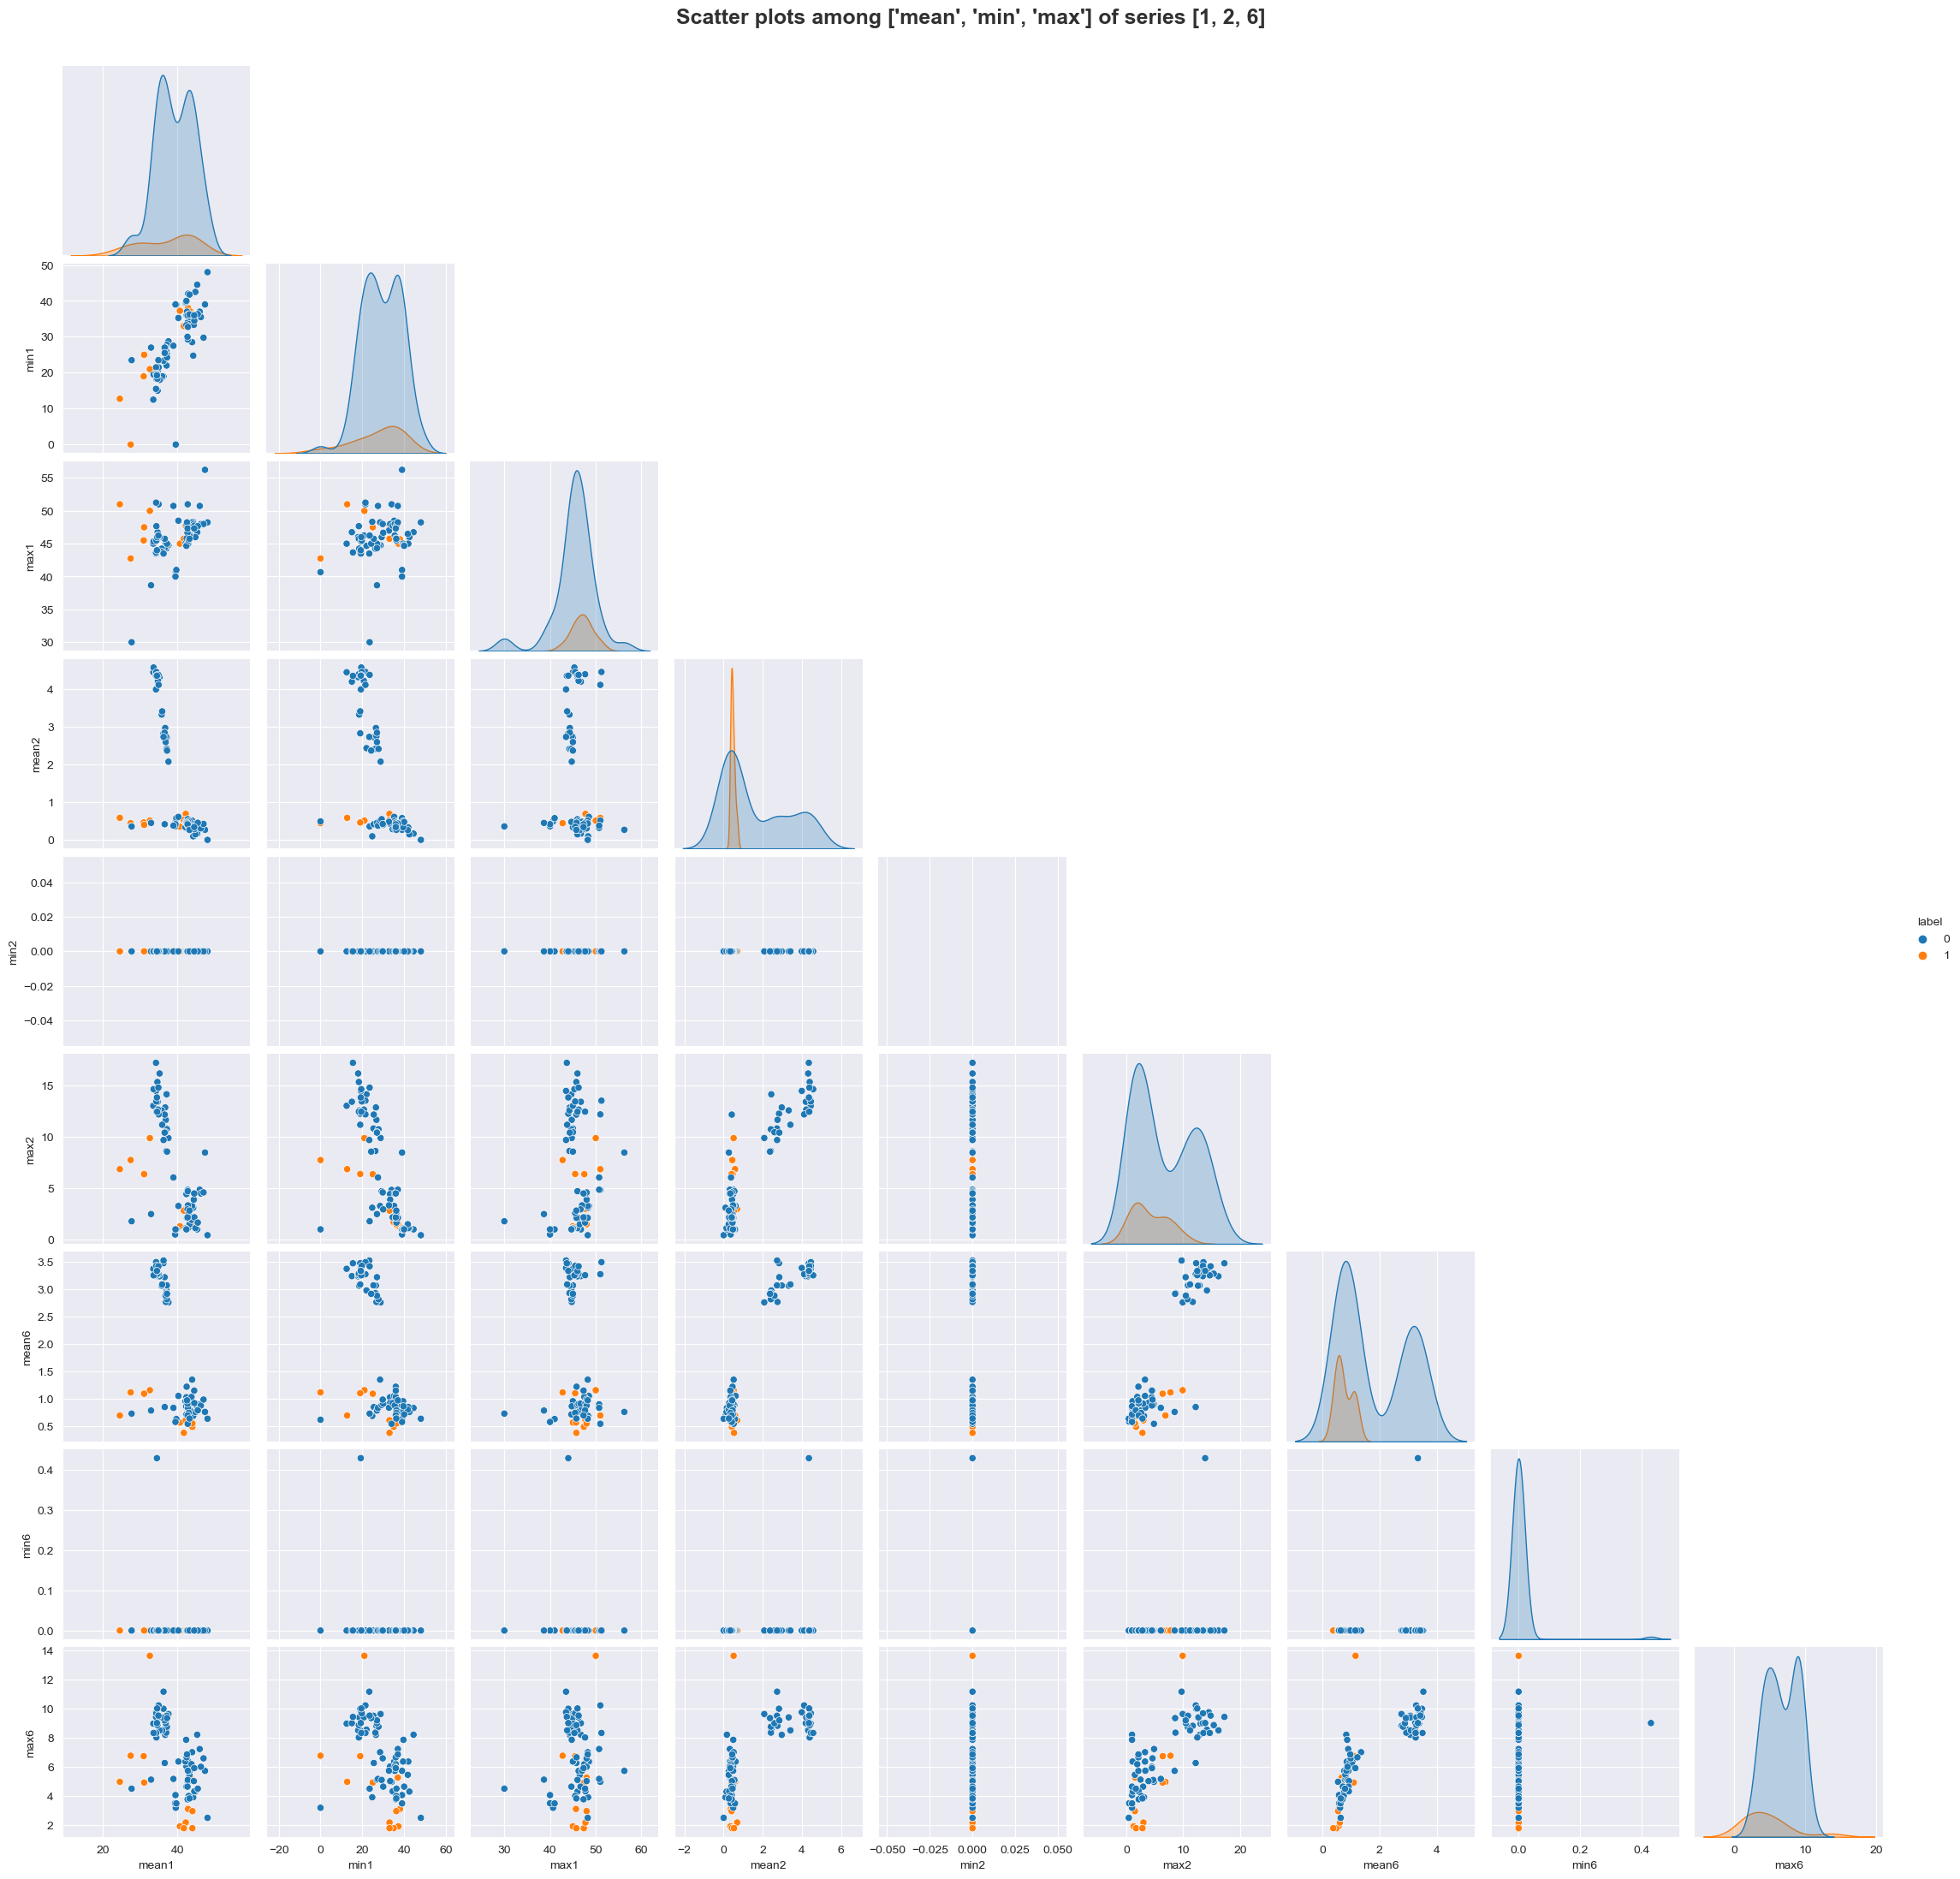

In [207]:
def scatterplot_sub(sub_features, series_number, data_df, label_list):

    features = []
    for i in series_number:
        for f in sub_features:
            features.append(f+str(i))
    features_df = data_df[features]
    features_df.insert(len(features_df.columns), 'label', label_list)
    pairplot_fig = sns.pairplot(
        features_df, hue='label', vars=features_df.columns[:-1], corner=True)
    plt.subplots_adjust(top=0.95)
    pairplot_fig.fig.suptitle(f"Scatter plots among {sub_features} of series {series_number}",
                              fontsize=18, alpha=0.95, weight='bold')
    plt.show()

    return features_df
sub_features = ["mean", "min", "max"]
series_number = [1, 2, 6]
label_list = [binary_class[i] for i in train_index]
f1 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

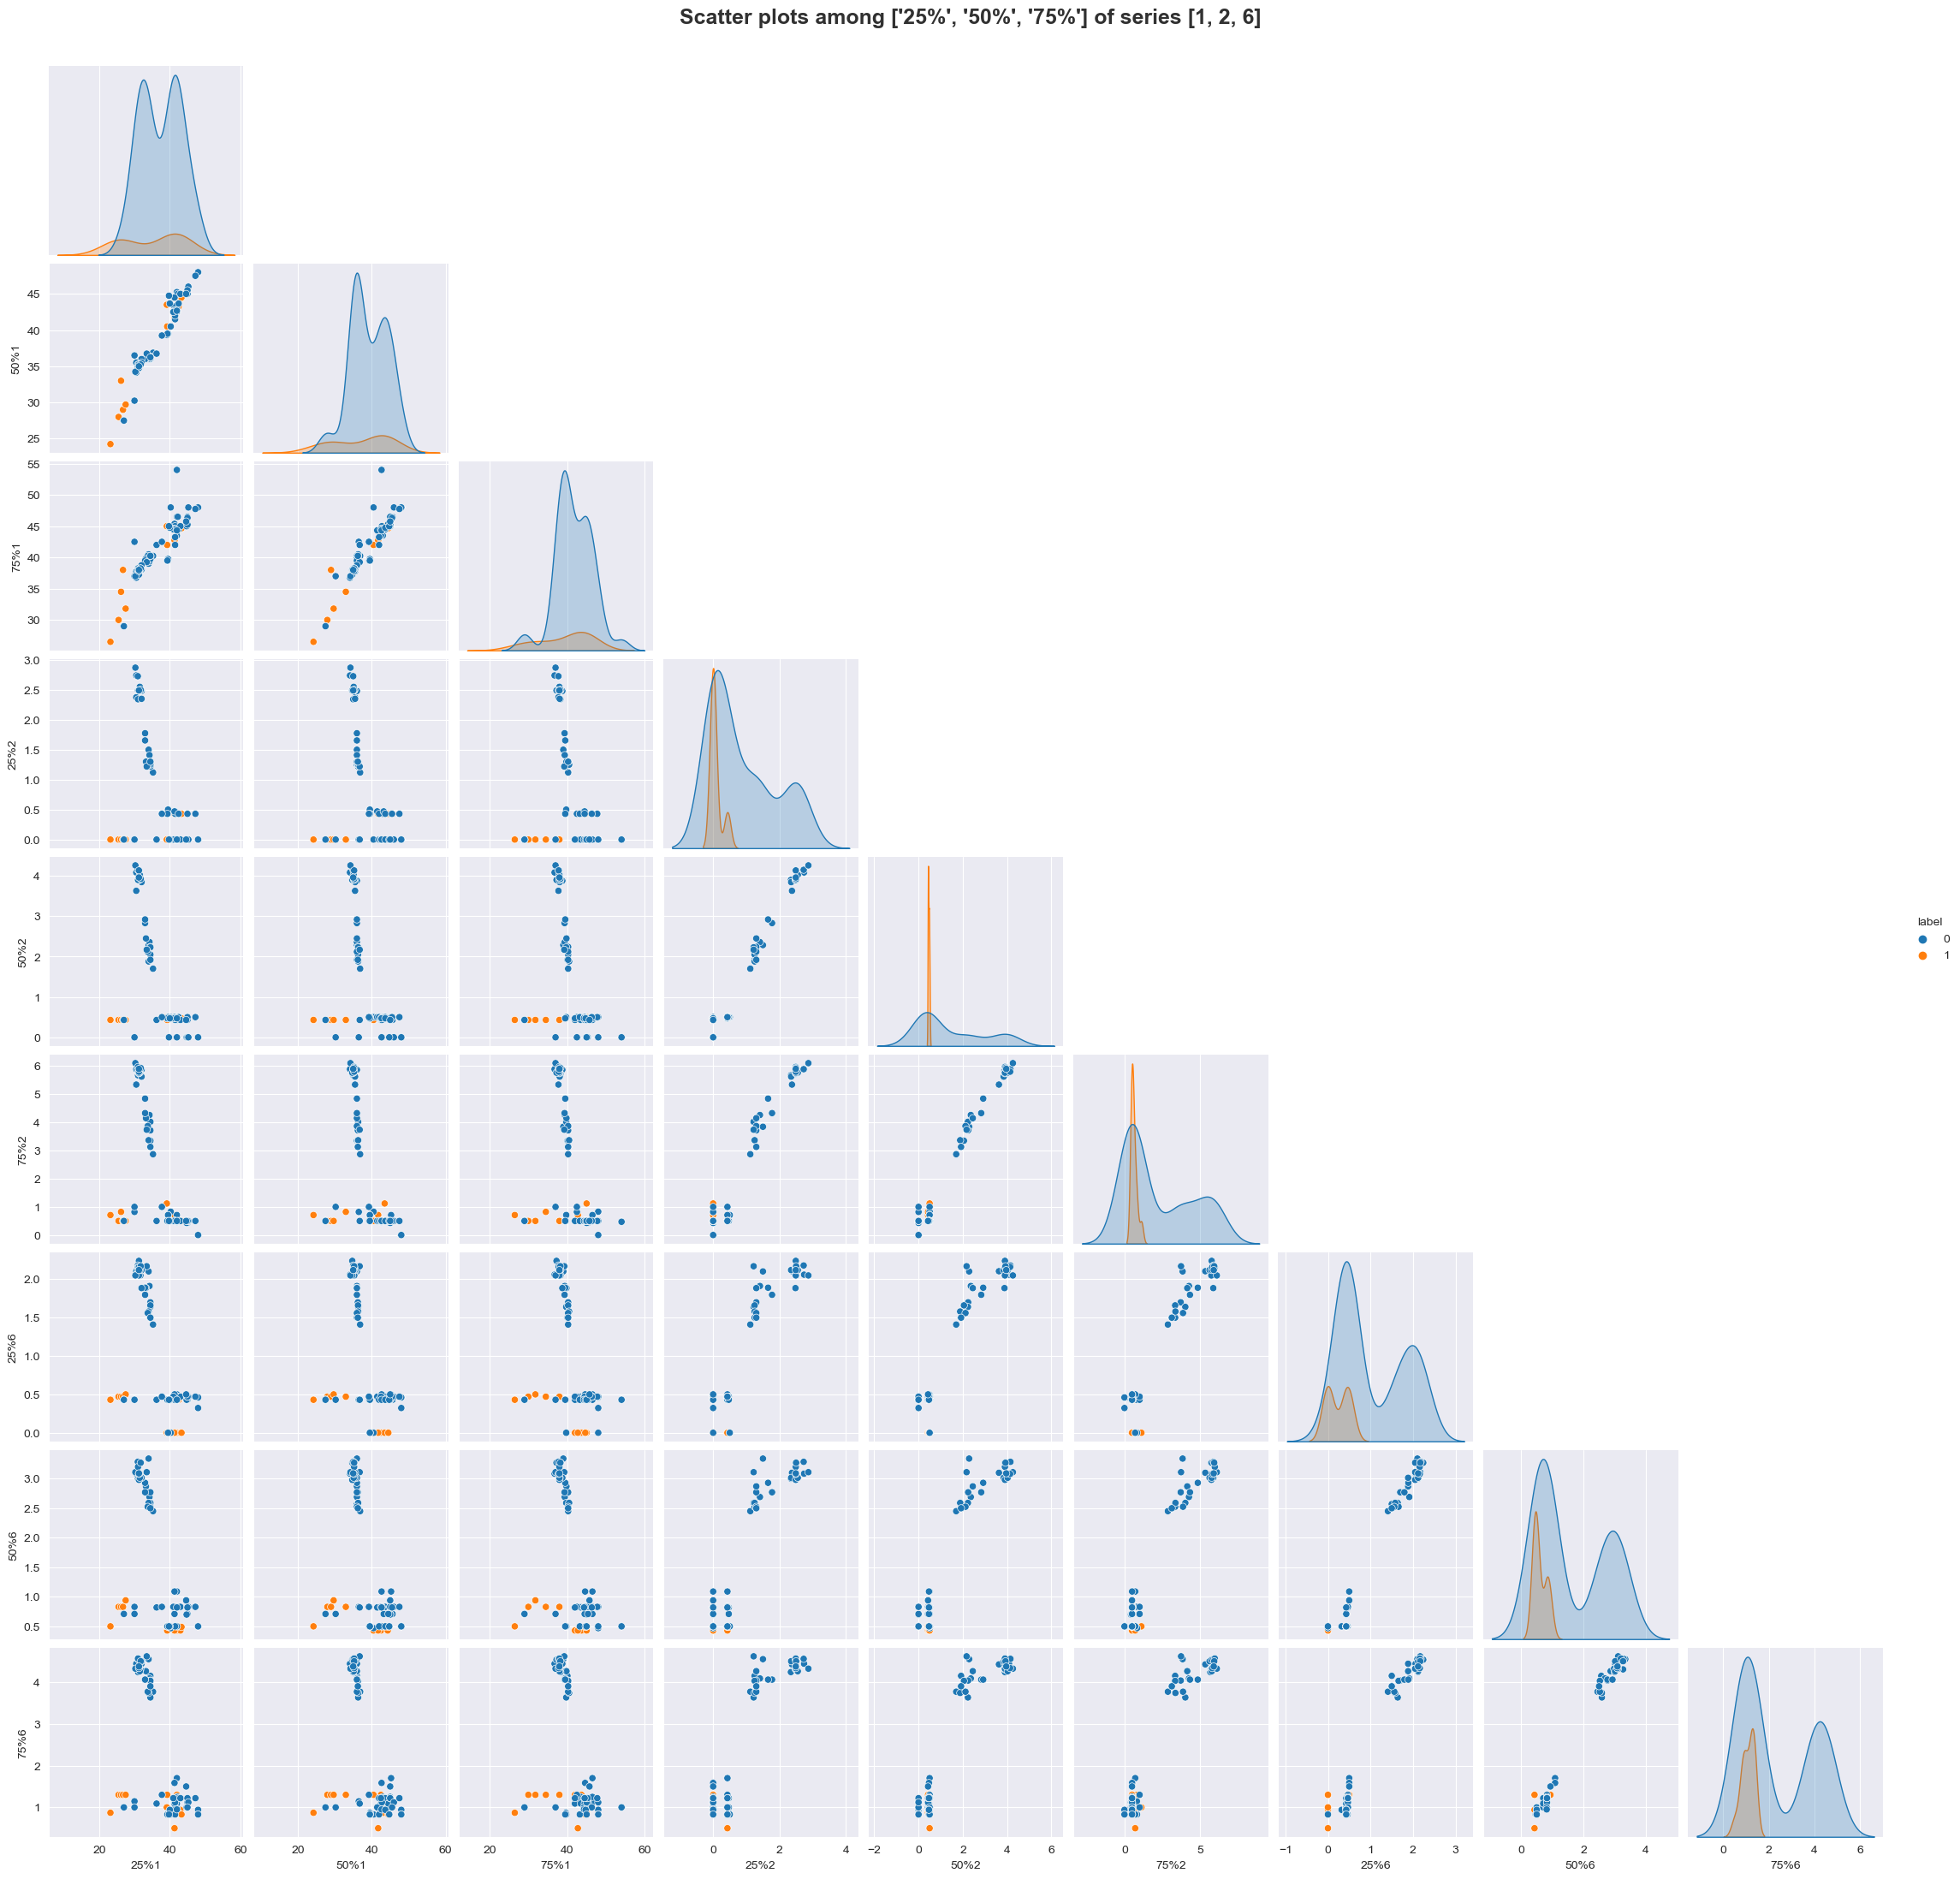

In [208]:
sub_features = ["25%", "50%", "75%"]
series_number = [1, 2, 6]
label_list = [binary_class[i] for i in train_index]
f2 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

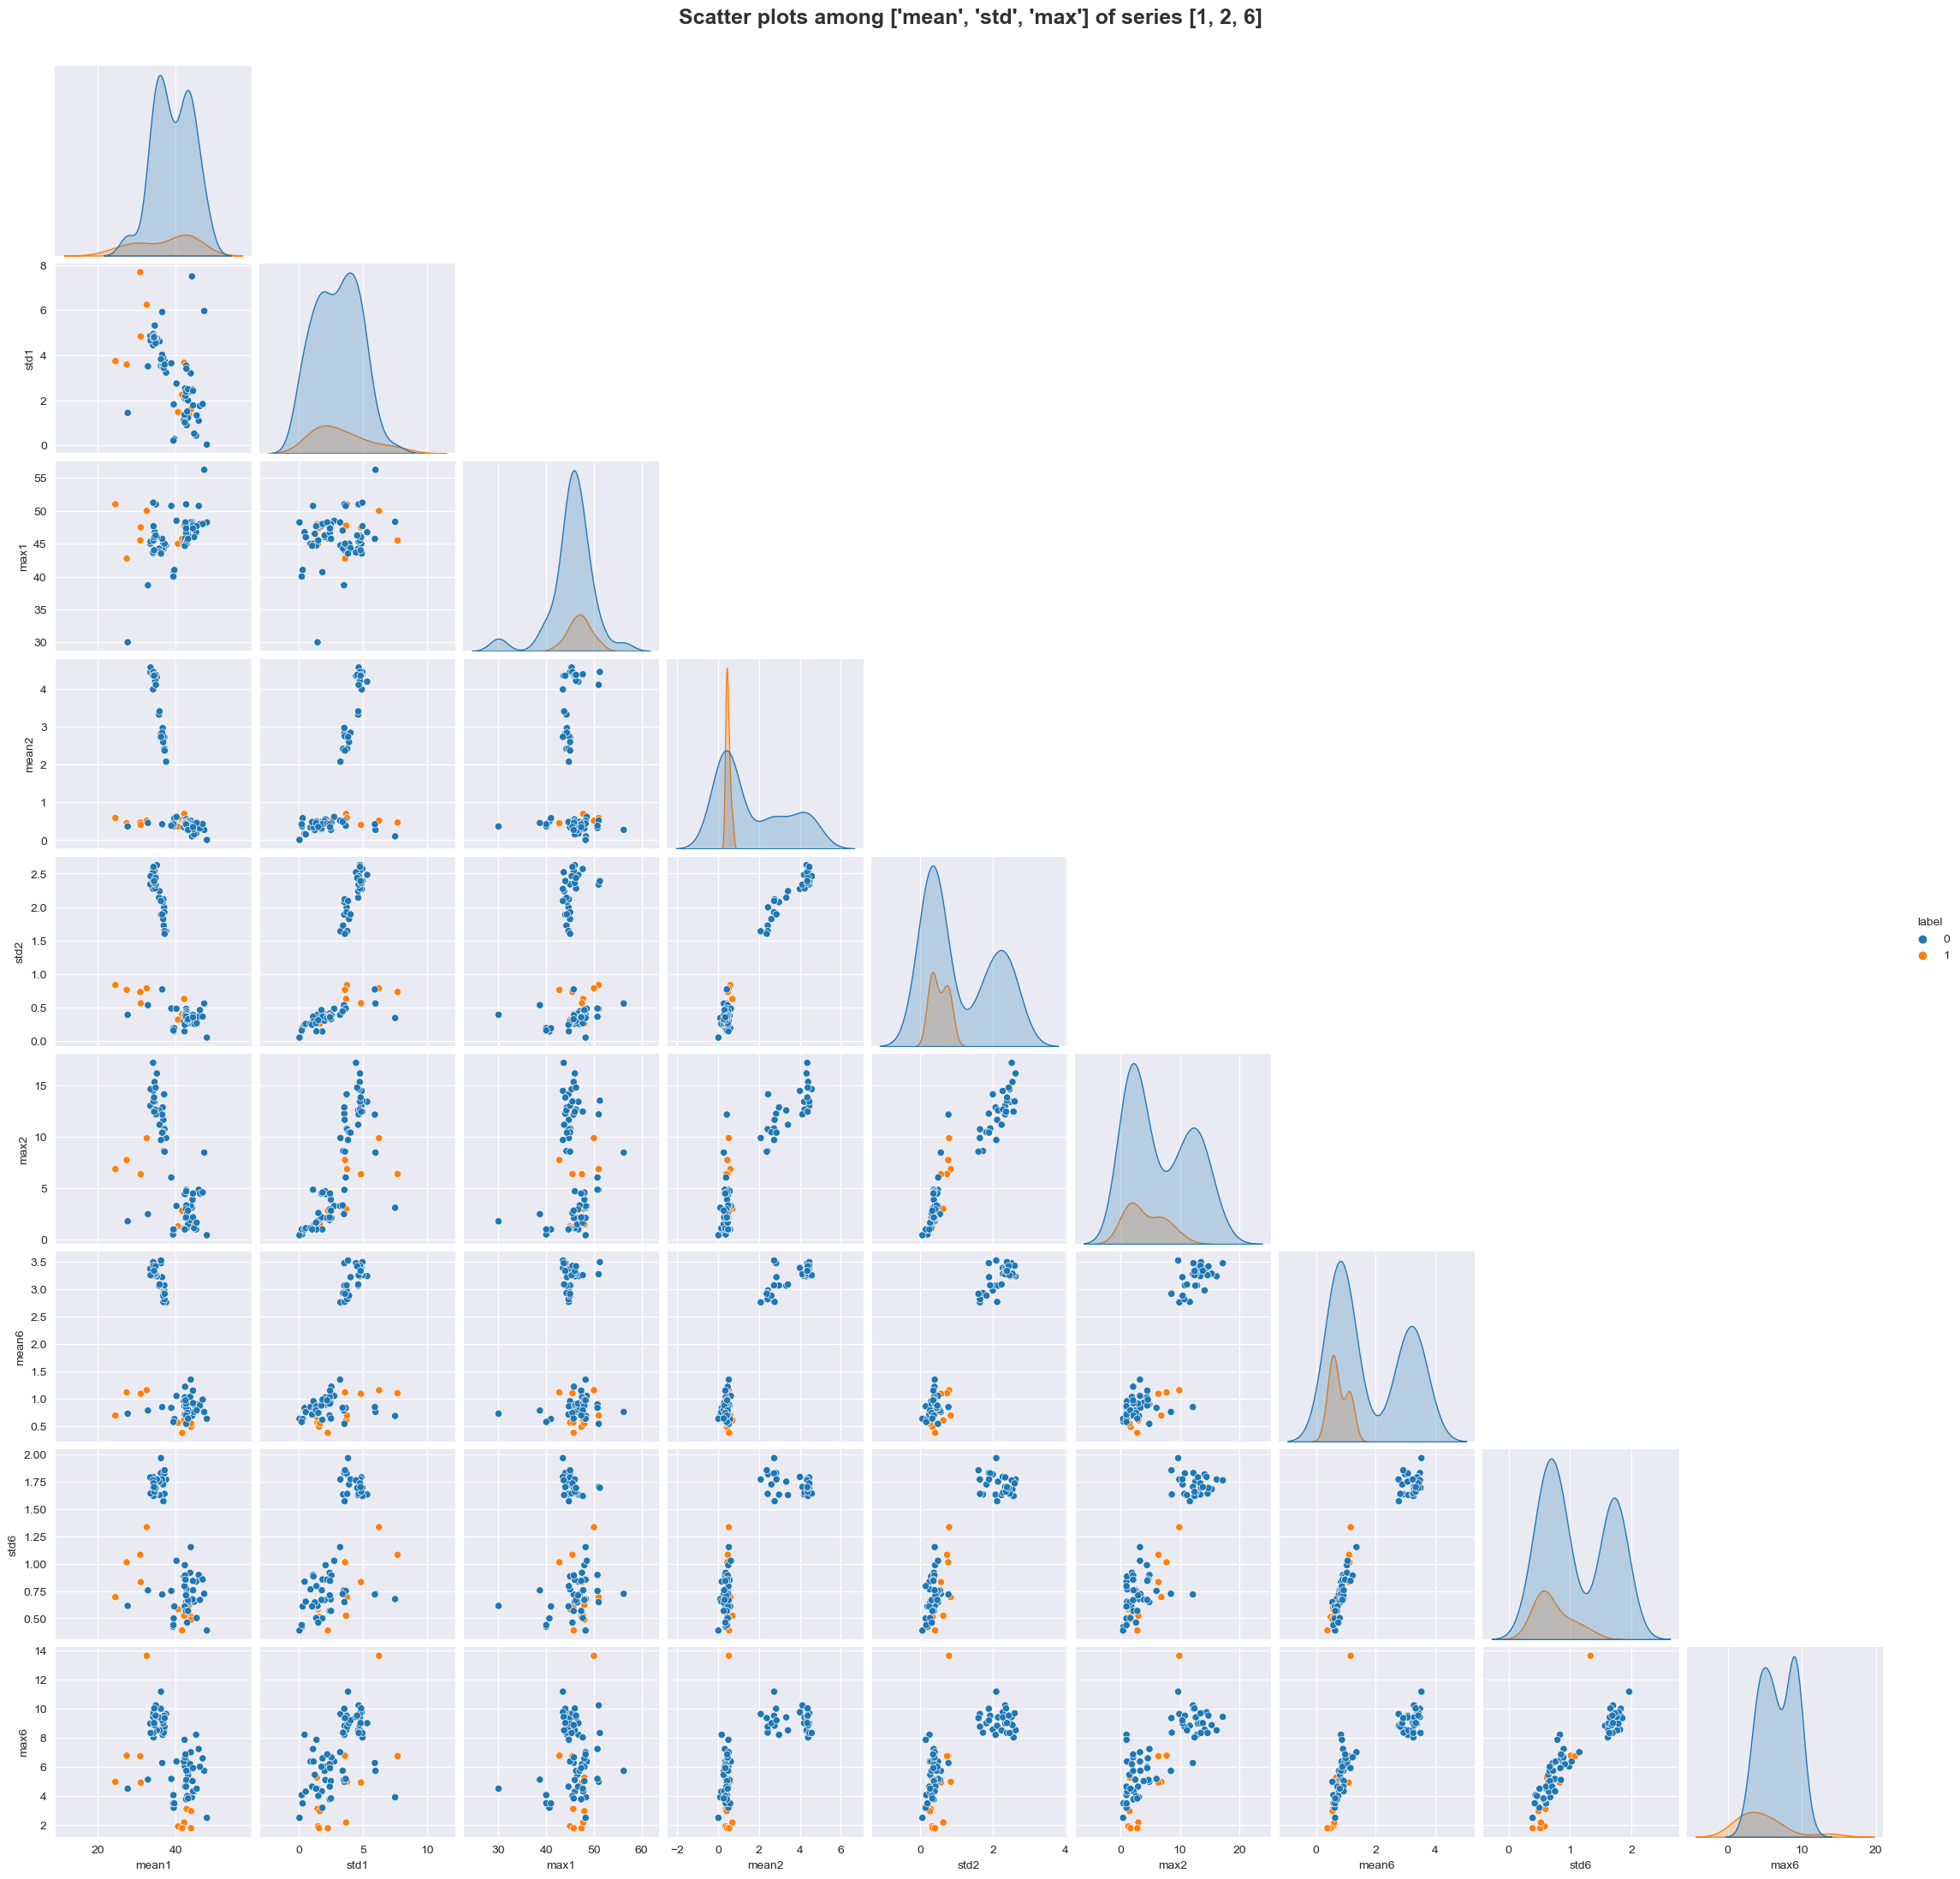

In [209]:
sub_features = ["mean", "std", "max"]
series_number = [1, 2, 6]
label_list = [binary_class[i] for i in train_index]
f3 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

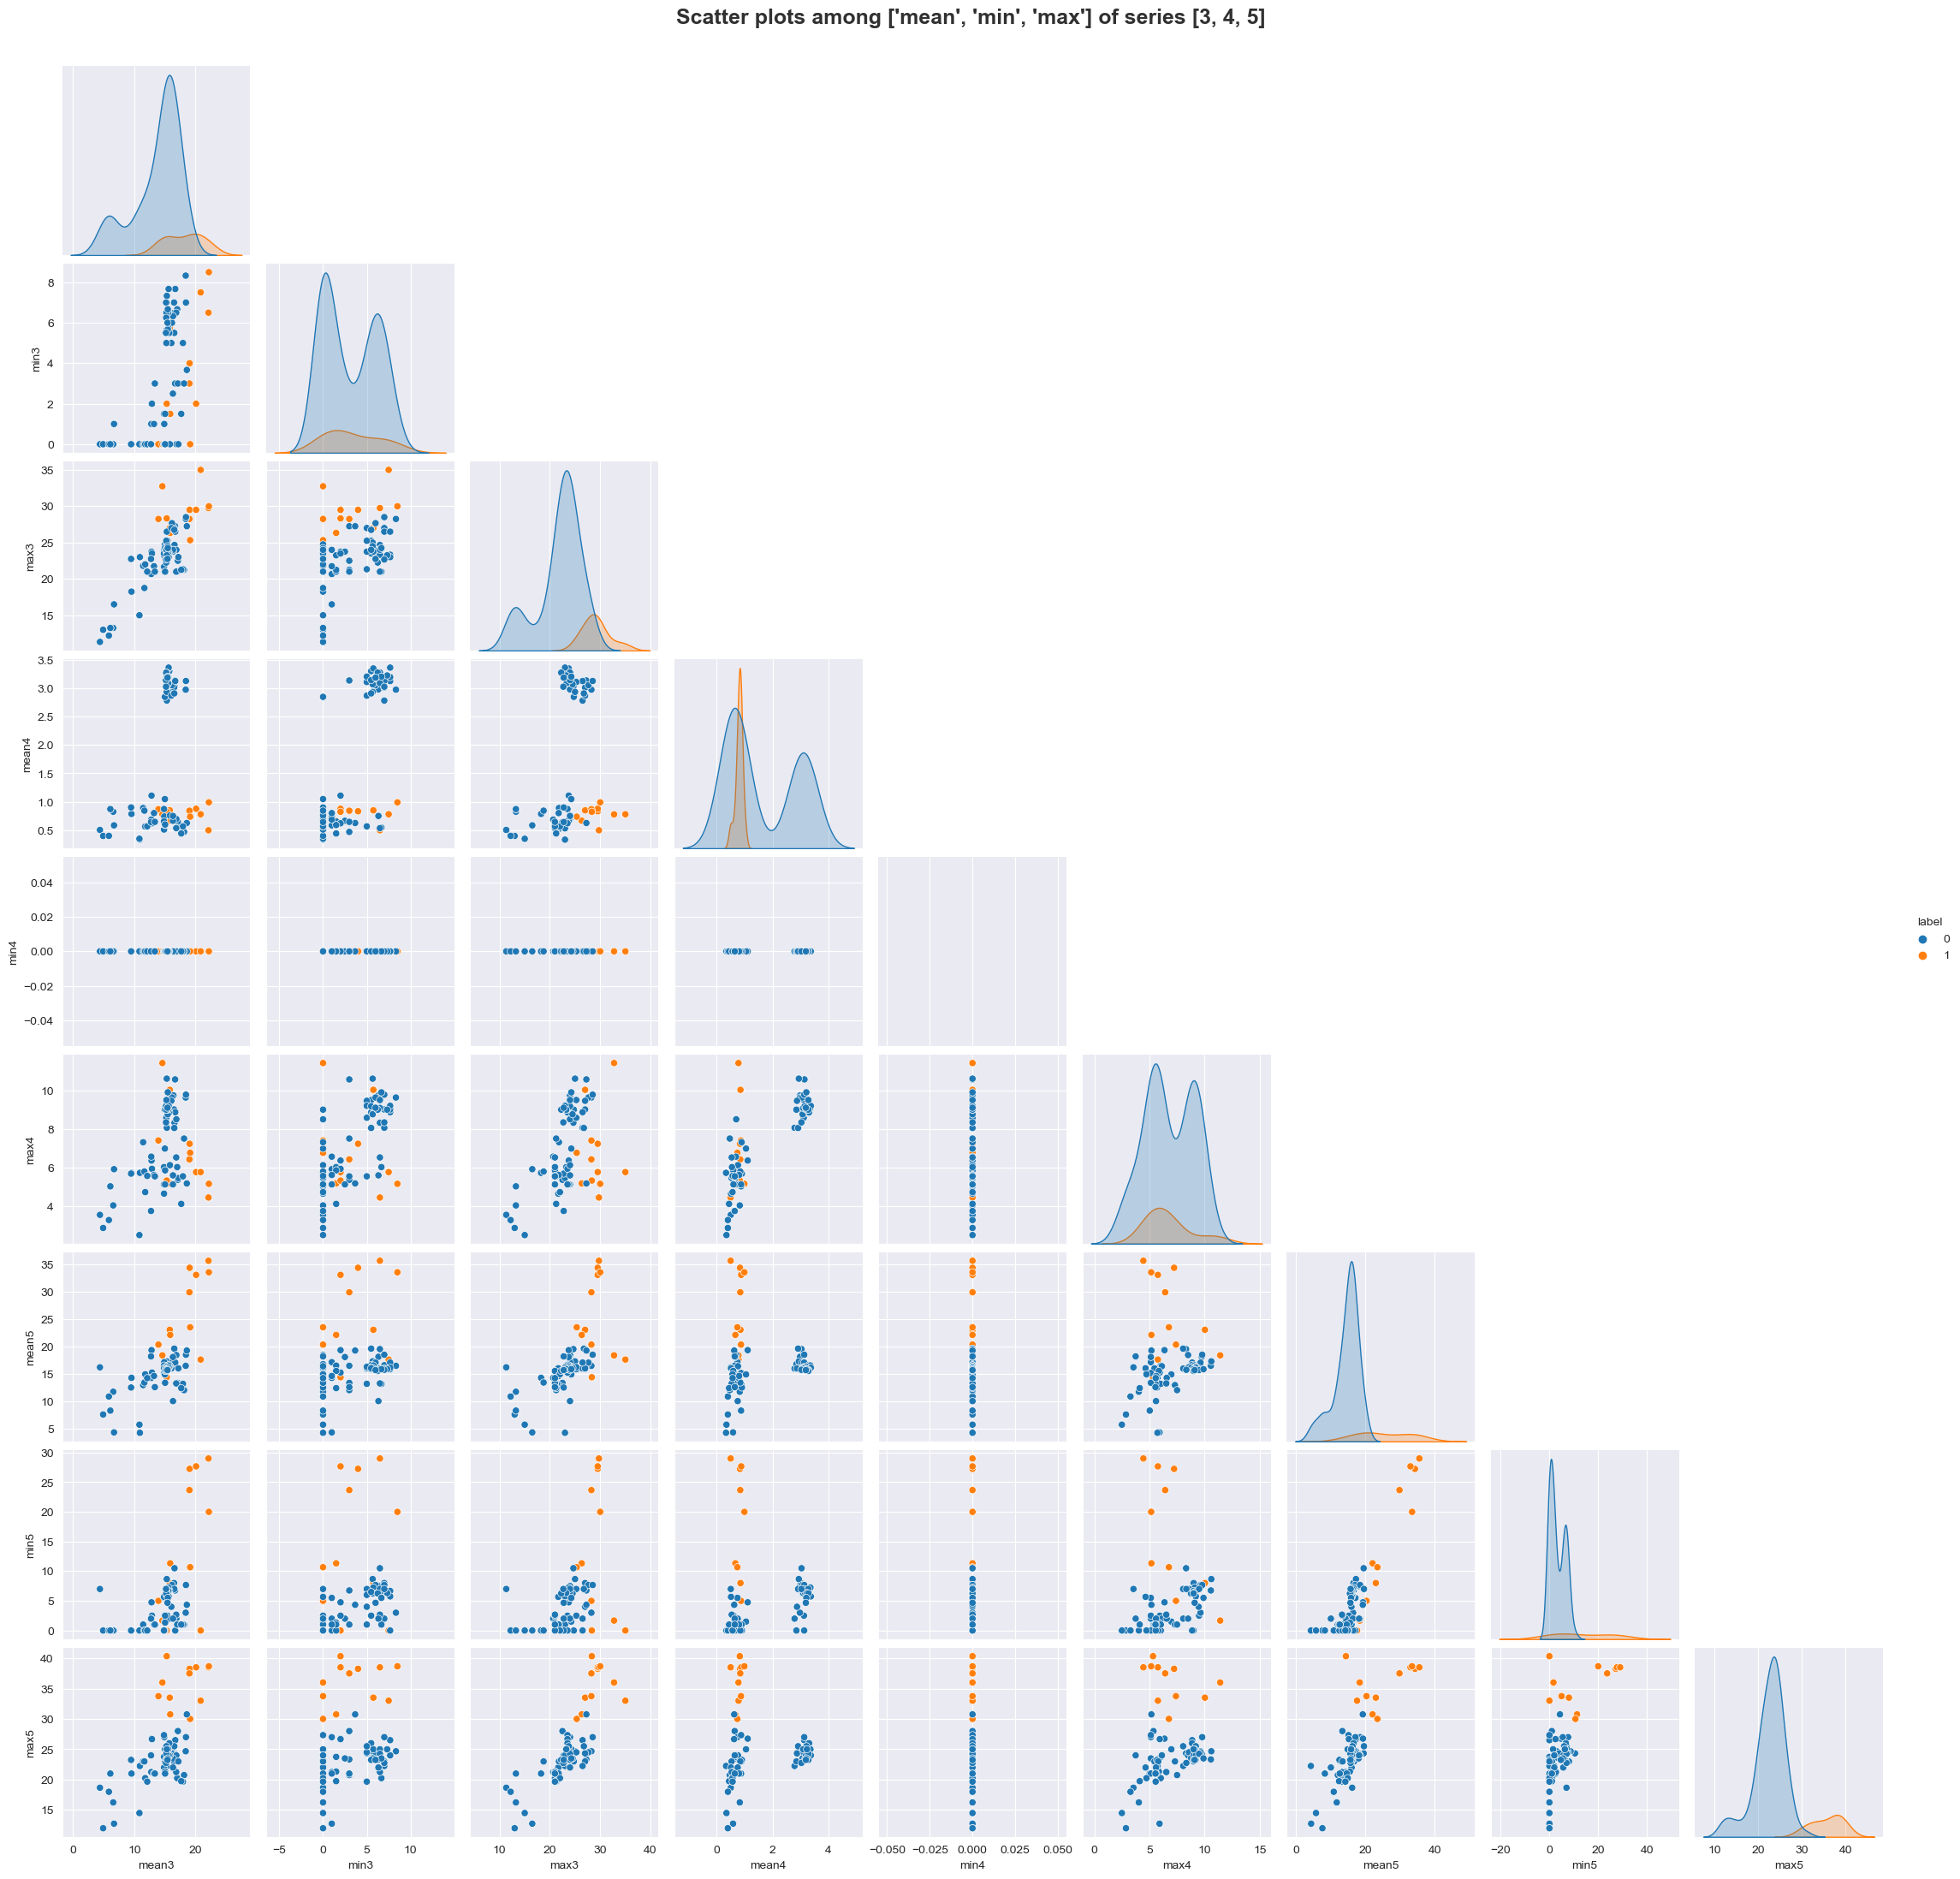

In [210]:
sub_features = ["mean", "min", "max"]
series_number = [3, 4, 5]
label_list = [binary_class[i] for i in train_index]
f4 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

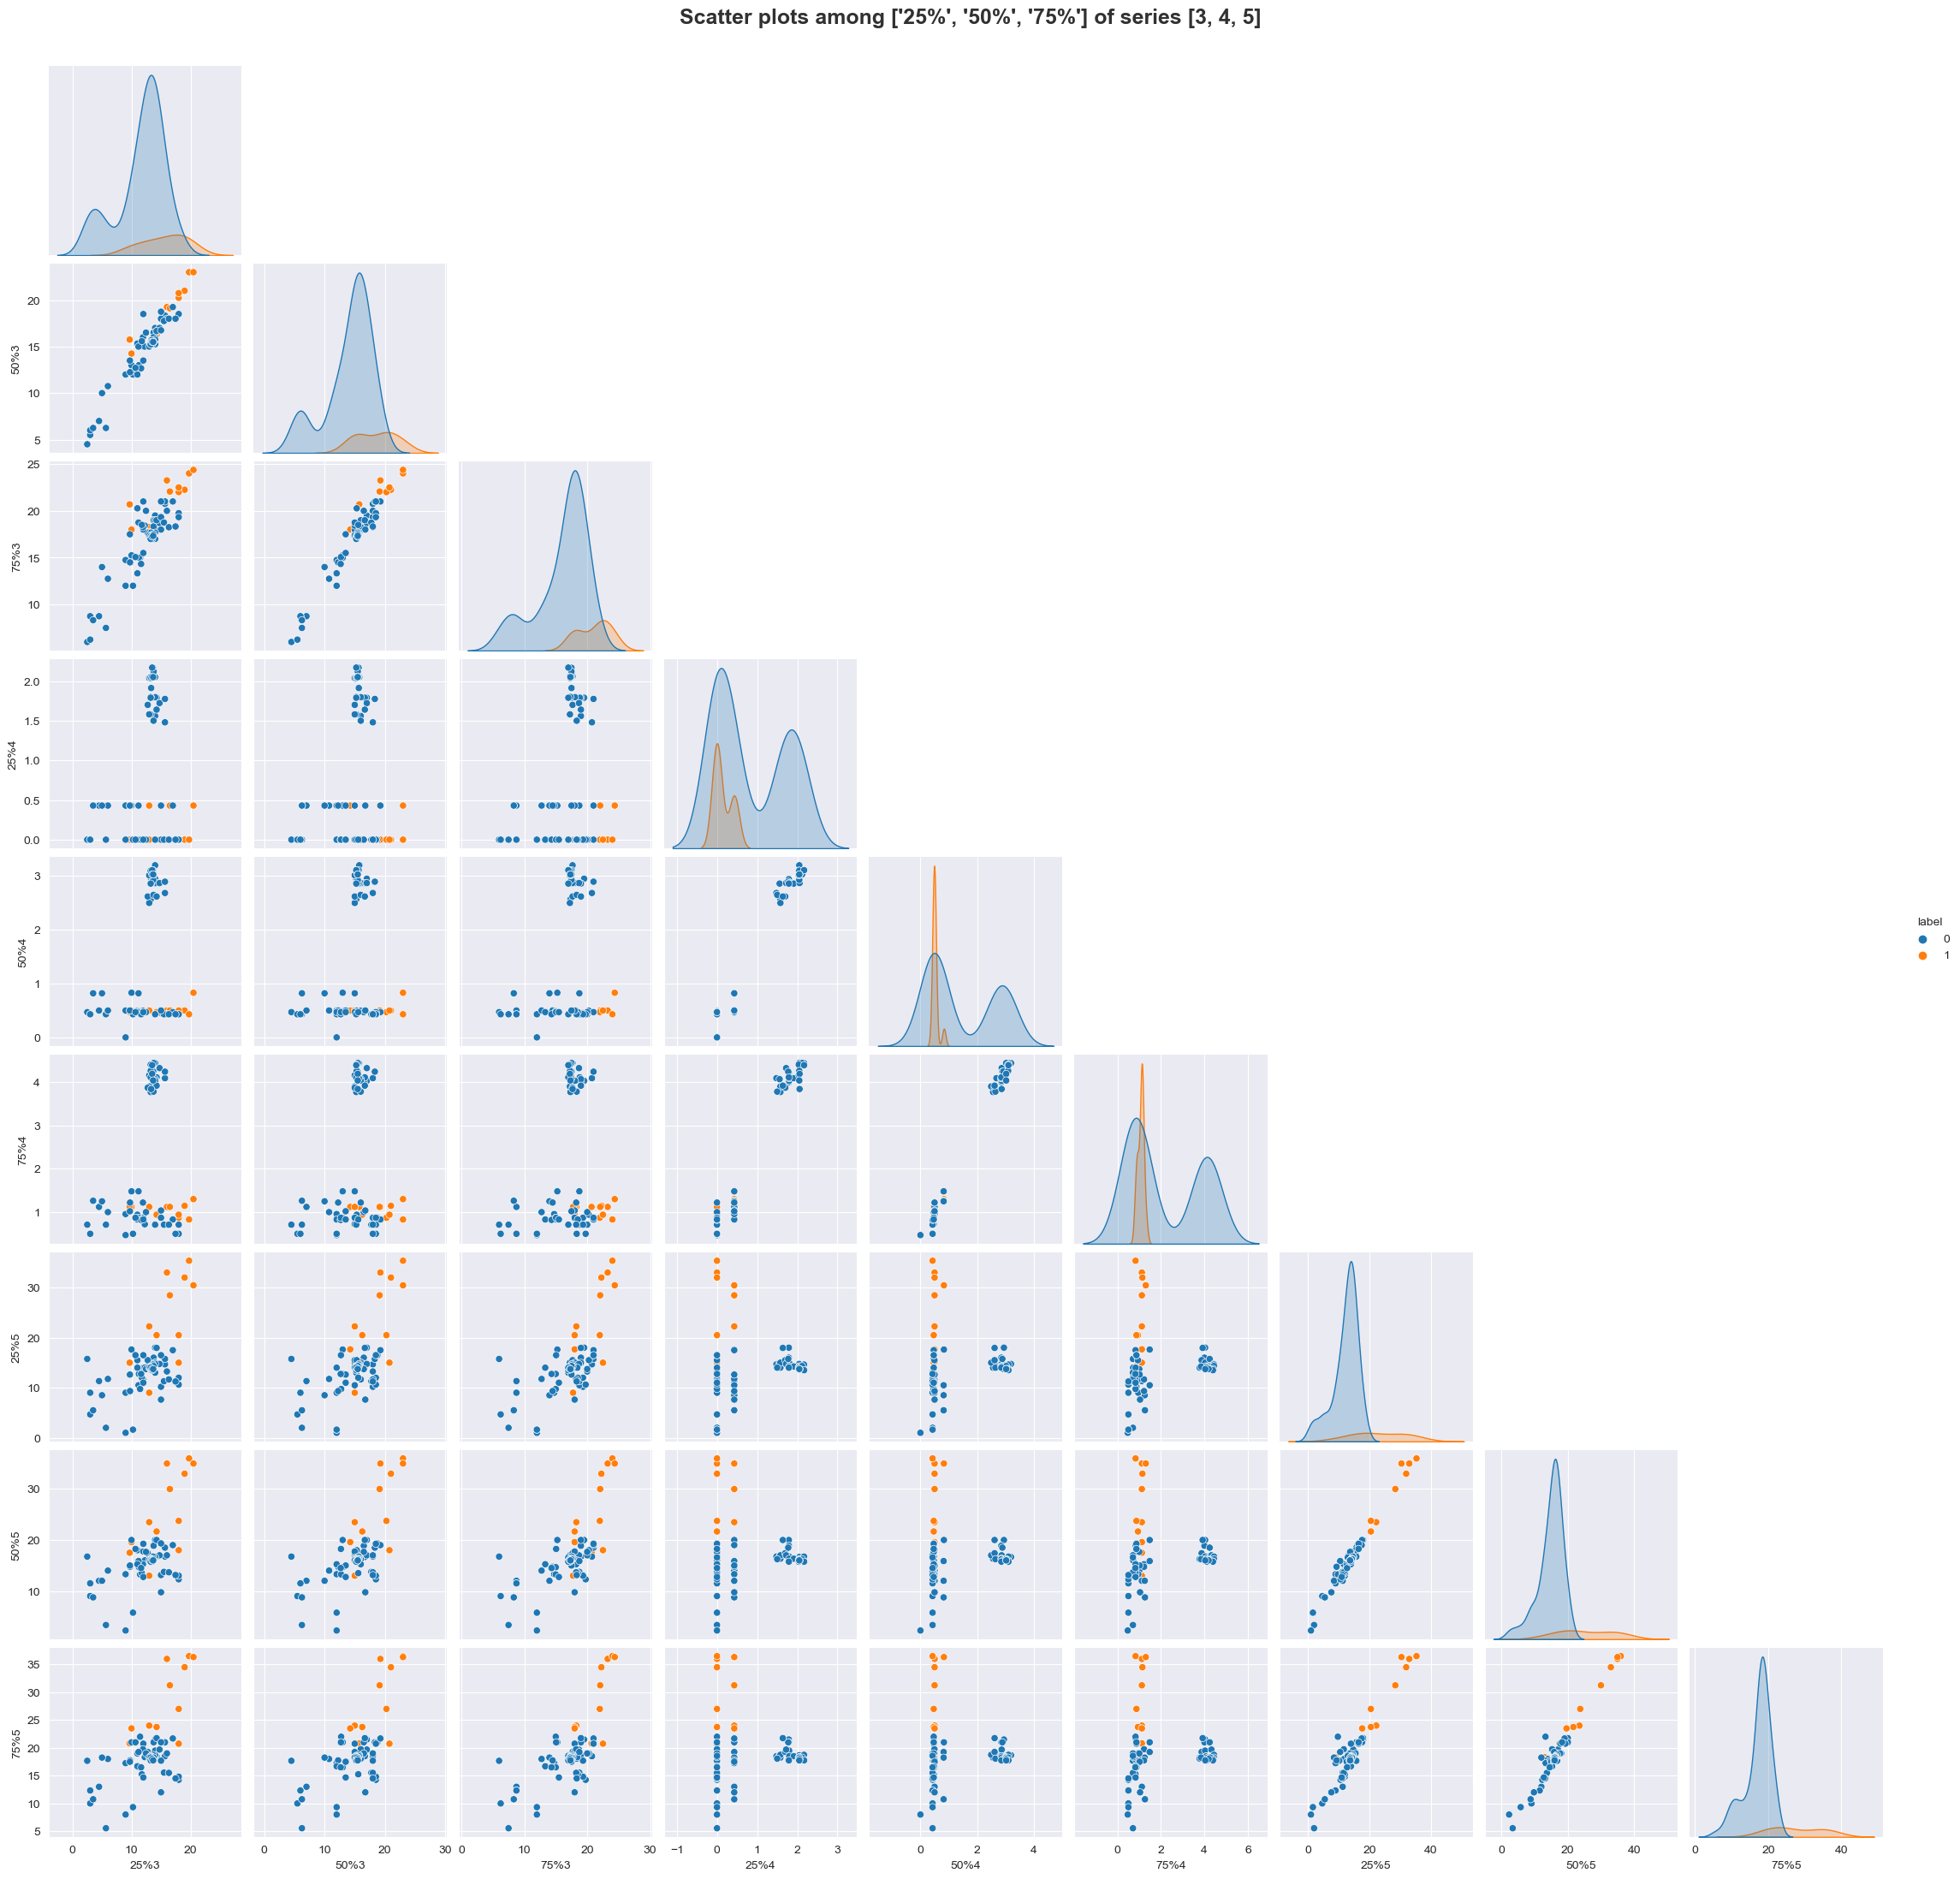

In [211]:
sub_features = ["25%", "50%", "75%"]
series_number = [3, 4, 5]
label_list = [binary_class[i] for i in train_index]
f5 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

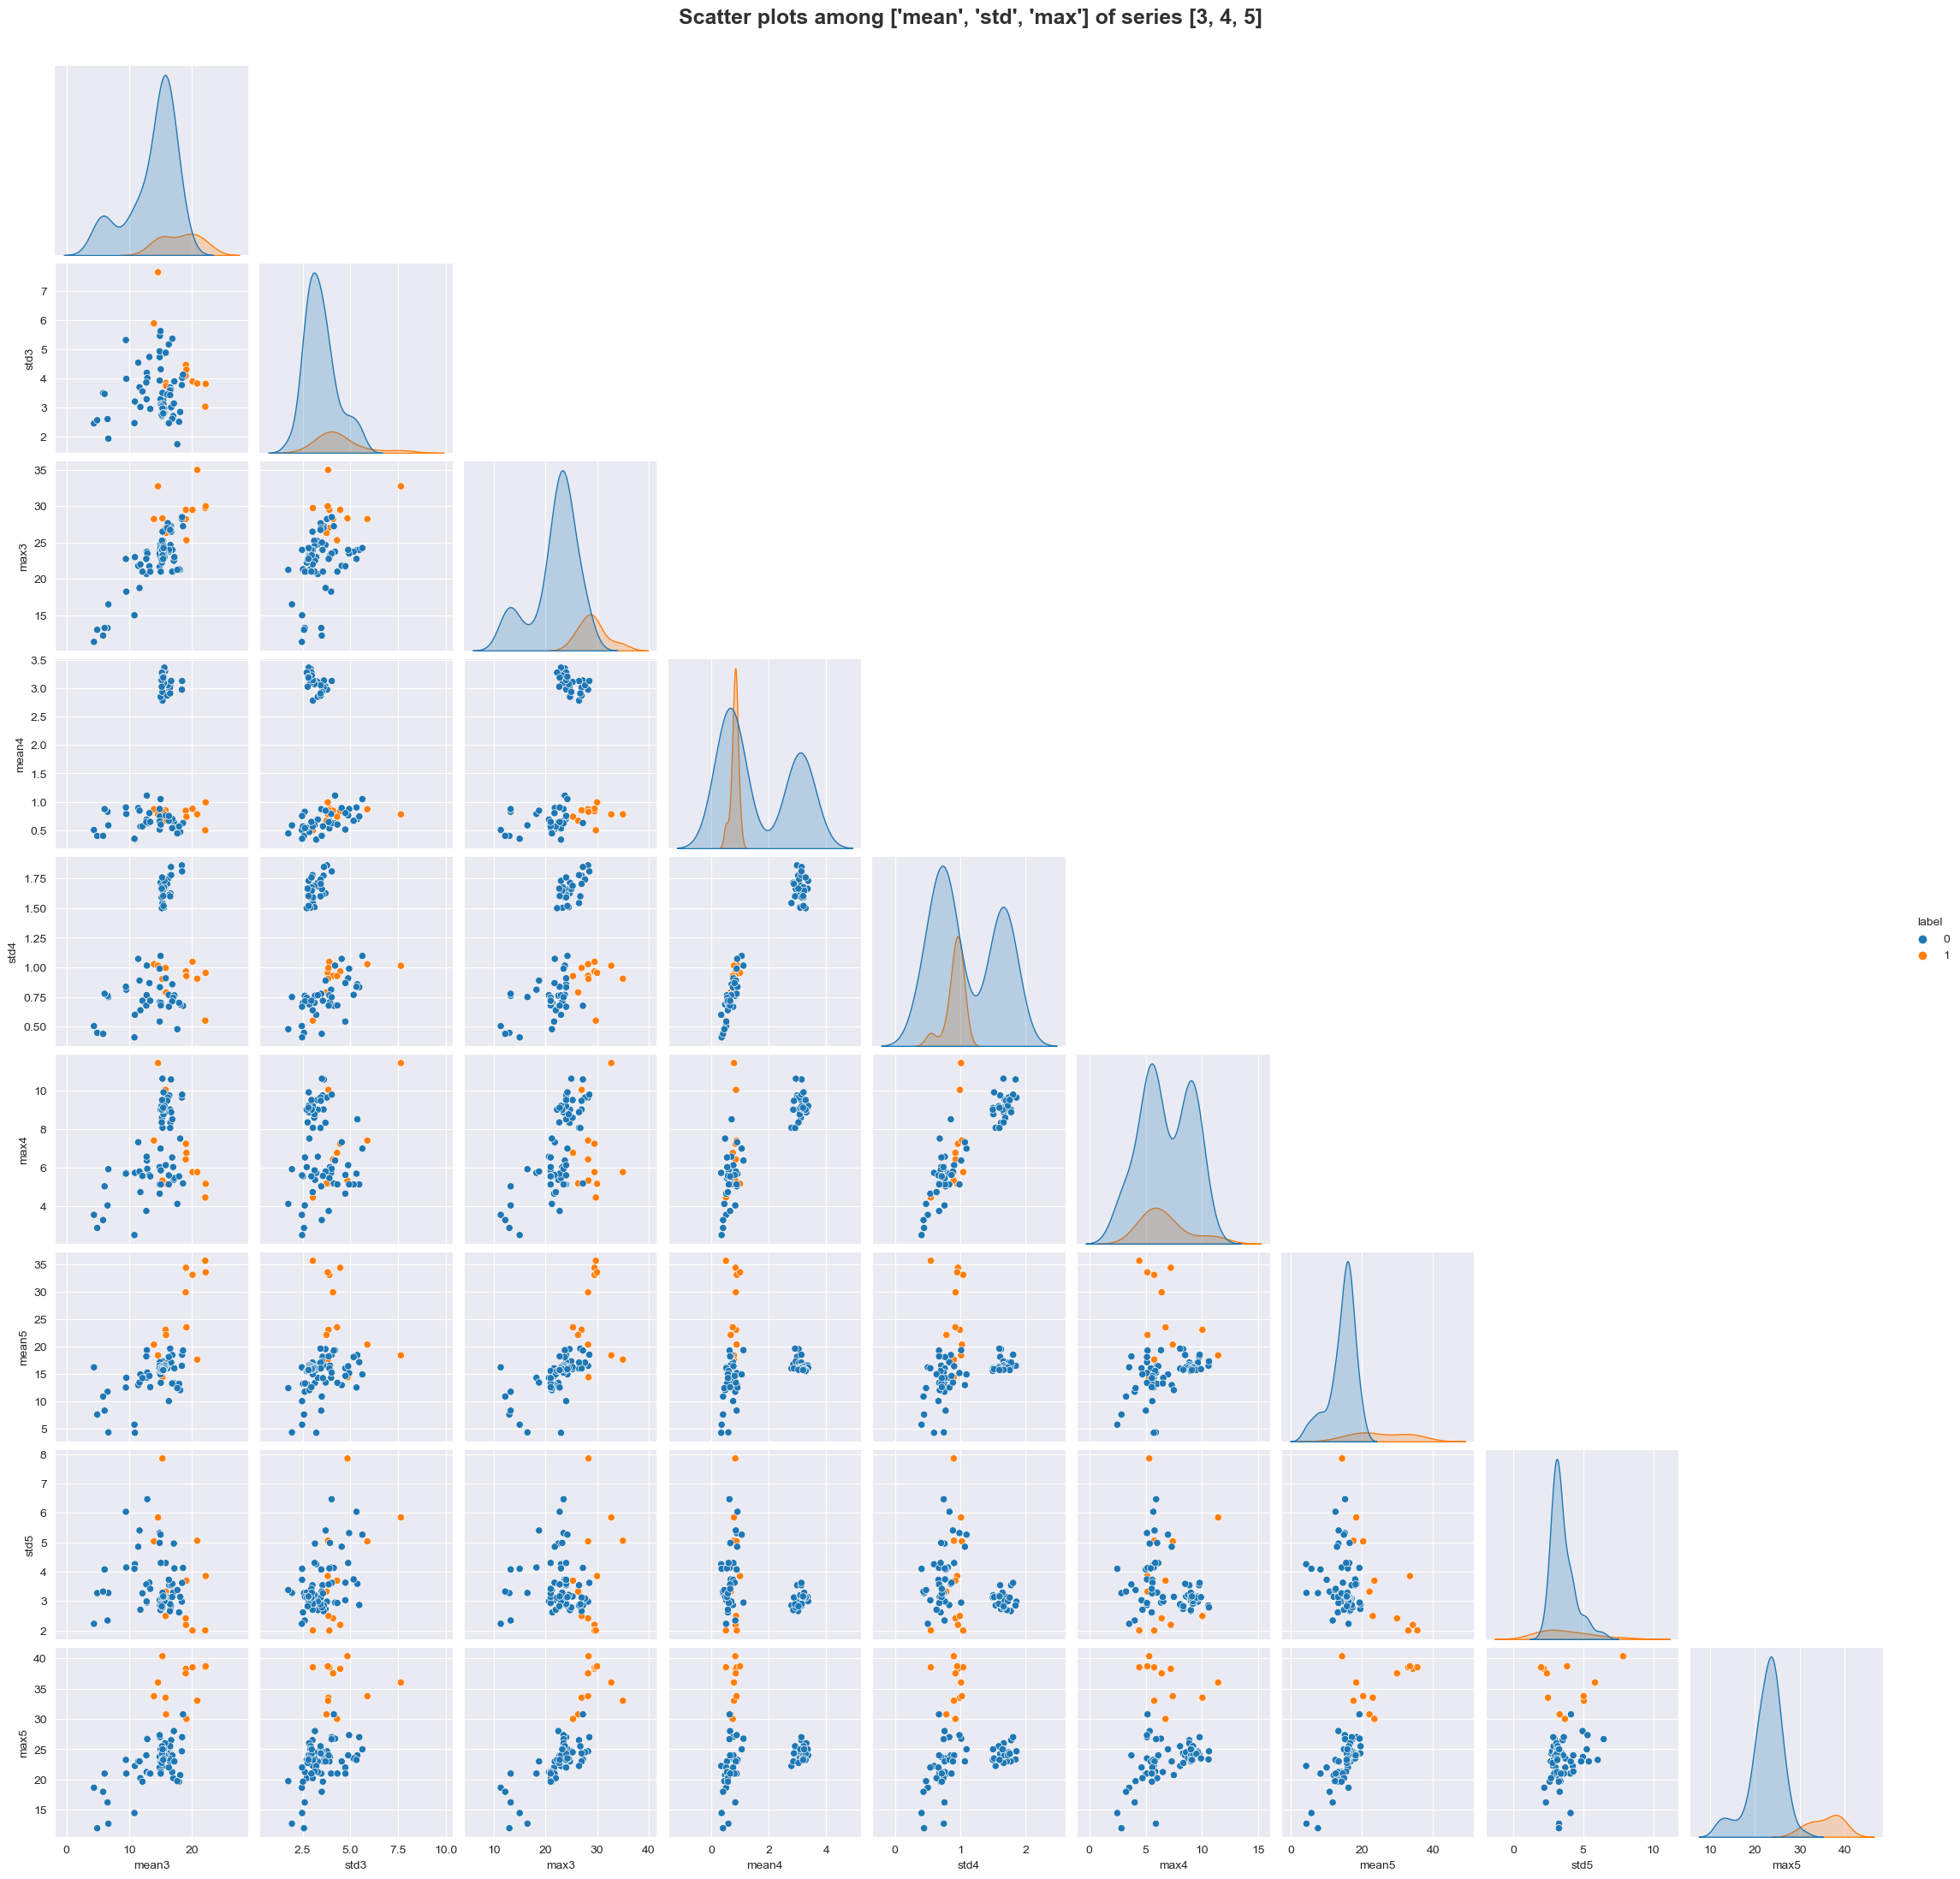

In [212]:
sub_features = ["mean", "std", "max"]
series_number = [3, 4, 5]
label_list = [binary_class[i] for i in train_index]
f6 = scatterplot_sub(sub_features, series_number,
                    TDF_df.iloc[train_index, :], label_list)

References:
https://blog.csdn.net/weixin_39843782/article/details/110396597
https://www.researchgate.net/figure/Time-domain-features_tbl1_279991612#:~:text=The%20time%2Ddomain%20features%20are,Kurtosis%20and%20Skewness.%20...&text=View-,...,with%20irrelevant%20or%20redundant%20information.
https://www.kaggle.com/code/oybekeraliev/time-domain-feature-extraction-methods
https://www.w3schools.com/python/pandas/pandas_csv.asp
